In [1]:
from flim_analysis.preprocessing.segmentation import *
from flim_analysis.preprocessing.processing import *
from utils.plots_func import *

bioimageio_utils.py (2): pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.


# FLIM Data Preprocessing and Segmentation

The preprocessing and segmentation steps for the FLIM data were performed using the **`flim_stardist`** Python environment.


## Define Parameters

In [2]:
leap_num = '043'

## FLIM Data Preprocessing — Channel Splitting

In this step of the TNBC FLIM tissue analysis pipeline, we preprocess the raw `.tif` images by **splitting two-channel FLIM images into separate files**:
- **Fluorescence intensity channel**
- **Fluorescence lifetime channel**

Each `.tif` file from the specified directory contains two interleaved image channels.  
The function `split_2_channel_to_1` is applied to **all `.tif` files** in the directory to perform this separation, storing the results in predefined output folders.

> **Note:** Before running this step, make sure the following directories are defined in the constants file (e.g., `const.py`):
> ```python
> fluorescent_dir = os.path.join(base_dir, 'fluorescent_channel')
> flim_dir = os.path.join(base_dir, 'flim_channel')
> ```
> These should be accessible in your script as:
> ```python
> const.FLUORESCENT_DIR
> const.FLIM_DIR
> ```

These directories will hold the resulting single-channel images after the split.


In [6]:
run_preprocess()

Files process start from /sise/assafzar-group/assafzar/leor/delta_tissue_maddy/data/tnbc_organised/4_FLIM/raw.
Core Responder Count: 30
Core Non-Responder Count: 23
Resection Count: 17
Loaded 70 LEAP(s) from RCB file.
Leap Number: 015
LEAP 015 - start split to fluorescent and flim channels

LEAP 015 - finish split 2 channels

Preprocessing complete: 85 files processed from /sise/assafzar-group/assafzar/leor/delta_tissue_maddy/data/tnbc_organised/4_FLIM/raw.
Leap Number: 016
LEAP 016 - start split to fluorescent and flim channels

File exists: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/fluorescent_channel/LEAP016_fluorescent.tif

Preprocessing complete: 85 files processed from /sise/assafzar-group/assafzar/leor/delta_tissue_maddy/data/tnbc_organised/4_FLIM/raw.
Leap Number: 017
LEAP 017 - start split to fluorescent and flim channels

File exists: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/fluorescent_channel/LEAP017_fluorescent.tif

Preprocessing complete

### Visualization of the channel splitting 

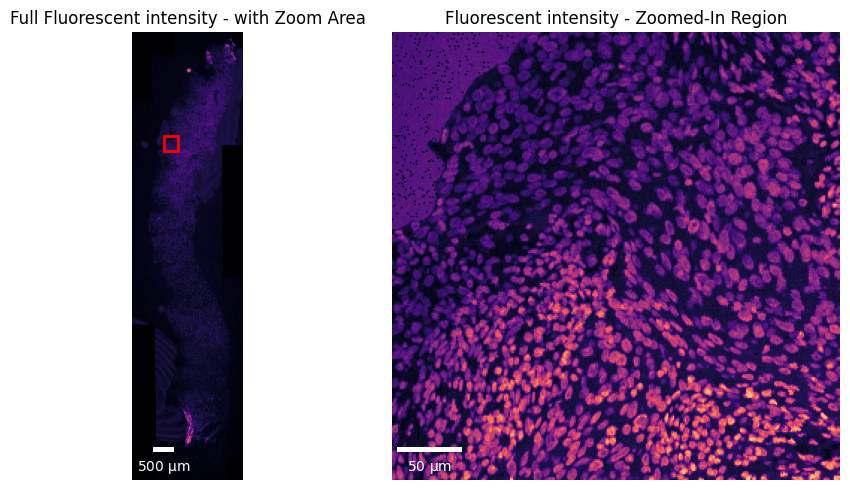

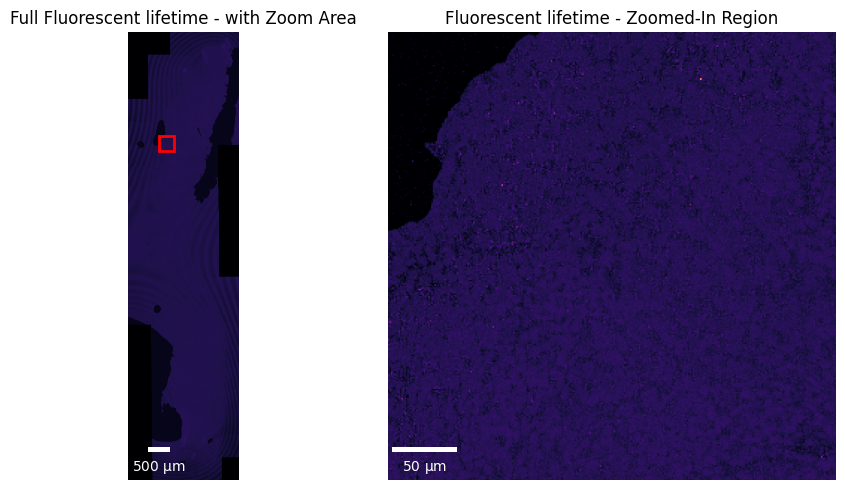

In [2]:

fluorescent_intensity_path = os.path.join(const.FLUORESCENT_DIR, f'LEAP{leap_num}_fluorescent.tif')

plot_full_image_with_zoom_side_by_side(
    img_path=fluorescent_intensity_path,
    image_type='Fluorescent intensity',
    center=(800,2300),
    zoom_size=300,
    figure_size=(10,5)
)


fluorescent_lifetime_path = os.path.join(const.FLIM_DIR, f'LEAP{leap_num}_flim.tif')

plot_full_image_with_zoom_side_by_side(
    img_path=fluorescent_lifetime_path,
    image_type='Fluorescent lifetime',
    center=(800,2300),
    zoom_size=300, 
    figure_size=(10,5)  
)


## FLIM Data Segmentation with StarDist

We segment fluorescence images using the StarDist2D model (TensorFlow-based, GPU-supported).

This step:
- Extracts LEAP IDs from the metadata file
- Checks if segmentation already exists
- Applies StarDist segmentation and saves output masks

**Input Requirements:**
- `const.rcb_file`: Metadata file containing LEAP sample IDs
- `const.FLUORESCENT_DIR`: Directory with `.tif` fluorescence images (e.g. `LEAP<NUM>_fluorescent.tif`)
- `const.SEG_DIR`: Output folder for segmentation results

**Output:**
- Labeled masks saved as `LEAP<NUM>_segmentation_labels.tif` in `const.SEG_DIR`

GPU acceleration is used if available (TensorFlow-GPU + CUDA/cuDNN).


In [3]:
run_segmentation()

Core Responder Count: 31
Core Non-Responder Count: 26
Resection Count: 18
Total LEAP samples: 85
/sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations/LEAP015_segmentation_labels.tif
LEAP 015 requires segmentation
/sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations/LEAP016_segmentation_labels.tif
Segmentation already exists: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations/LEAP016_segmentation_labels.tif
/sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations/LEAP017_segmentation_labels.tif
Segmentation already exists: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations/LEAP017_segmentation_labels.tif
/sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations/LEAP018_segmentation_labels.tif
Segmentation already exists: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations/LEAP018_segmentation_labels.tif
/sise/assafzar-group/assafzar/reut/Test_FLIM/from_

W0000 00:00:1759480704.524335  937579 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
/sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/fluorescent_channel/LEAP015_fluorescent.tif
start with /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/fluorescent_channel/LEAP015_fluorescent.tif
Start StarDist segmentation
image size is: height= 8160, width= 9261
params: dict_items([('scale', 3.0), ('nms_thresh', 0.6)])


100%|██████████| 156/156 [03:00<00:00,  1.16s/it]


Finish StarDist segmentation
Finished segmentation for: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/fluorescent_channel/LEAP015_fluorescent.tif, process num: 0


### Visualization of segmentation

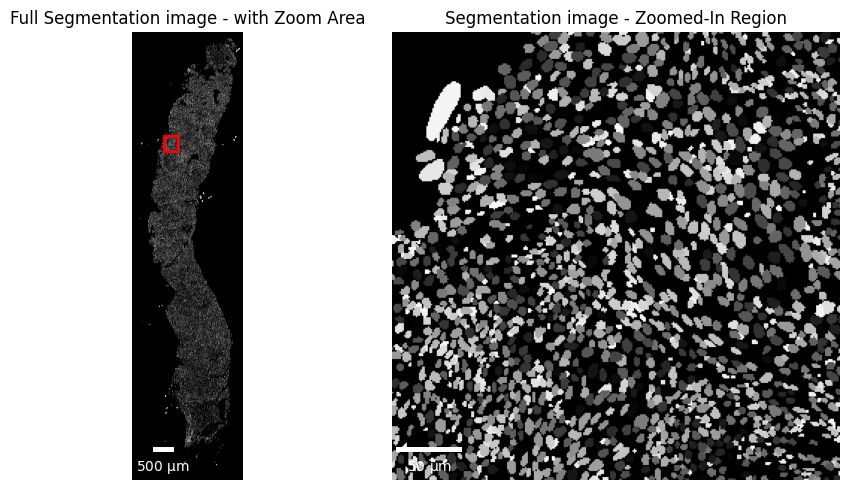

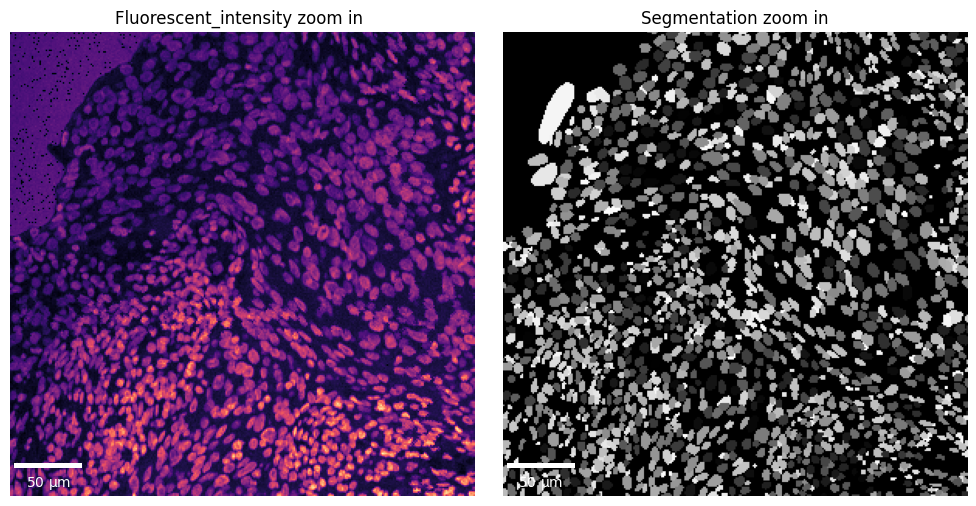

In [3]:
segmentation_path = os.path.join(const.SEG_DIR, f'LEAP{leap_num}_segmentation_labels.tif')
plot_full_image_with_zoom_side_by_side(
    img_path=segmentation_path,
    image_type='Segmentation image',
    center=(800,2300),
    zoom_size=300, 
    figure_size=(10,5), 
    cmap_color='gray'  
)

fluorescent_intensity_path = os.path.join(const.FLUORESCENT_DIR, f'LEAP{leap_num}_fluorescent.tif')
plot_zoomed_comparison(fluorescent_intensity_path, segmentation_path, 'Fluorescent_intensity zoom in ', 'Segmentation zoom in', figure_size=(10,5), center=(800,2300), cmap_color_2='gray')

## FLIM Data Segmentation Quality Control

We clean segmentation label files by removing outlier regions based on area.

This step:
- Iterates through LEAP samples from the metadata file
- Loads existing segmentation masks from `const.SEG_DIR`
- Removes regions:
  - Smaller than the 5th percentile
  - Larger than 100 pixels
- Saves cleaned masks as QC files

**Input Requirements:**
- `const.RCB_FILE`: Metadata file containing LEAP sample IDs
- `const.SEG_DIR`: Folder with original segmentation masks (`LEAP<NUM>_segmentation_labels.tif`)
- `const.SEG_AFTER_QC_DIR`: Output folder for QC-cleaned masks

**Output:**
- Cleaned segmentation masks saved as `LEAP<NUM>_segmentation_labels_qc.tif` in `const.SEG_AFTER_QC_DIR`


In [4]:
run_segmentation_qc()

Core Responder Count: 31
Core Non-Responder Count: 26
Resection Count: 18


utils.py (328): /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations_after_qc/LEAP015_segmentation_labels_qc.tif is a low contrast image


Saved cleaned segmentation to: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations_after_qc/LEAP015_segmentation_labels_qc.tif
QC completed for: LEAP015
Finished with LEAP 015
QC file already exists: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations_after_qc/LEAP016_segmentation_labels_qc.tif
Finished with LEAP 016
QC file already exists: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations_after_qc/LEAP017_segmentation_labels_qc.tif
Finished with LEAP 017
QC file already exists: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations_after_qc/LEAP018_segmentation_labels_qc.tif
Finished with LEAP 018
QC file already exists: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations_after_qc/LEAP019_segmentation_labels_qc.tif
Finished with LEAP 019
QC file already exists: /sise/assafzar-group/assafzar/reut/Test_FLIM/from_FLIM_dir/segmentations_after_qc/LEAP020_segmentation_labels_qc.tif
Finish

### Visualization of segmentation quality control 

In [ ]:
segmentation_path = os.path.join(const.SEG_DIR, f'LEAP{leap_num}_segmentation_labels.tif')
segmentation_qc_path = os.path.join(const.SEG_AFTER_QC_DIR, f'LEAP{leap_num}_segmentation_labels_qc.tif')

This code compares the original segmentation mask with a quality-controlled (QC) version and visualizes the differences using color.

Output:

*seg_image_colored_with_error_and_correct_region* - a color image where:

- Orange highlights removed/incorrect segmentations

- Blue shows valid/retained segmentations

In [6]:
img_qc = Image.open(segmentation_qc_path)
img_qc = np.array(img_qc)

img = Image.open(segmentation_path)
img = np.array(img)

binary_original = (img > 0).astype(np.uint8)
binary_qc = (img_qc > 0).astype(np.uint8)

# Multiply to find overlapping areas (retained)
mask_retained = binary_original * binary_qc  # 1 where label retained
# Subtract to find removed labels (present in original but not in QC)
mask_removed = binary_original * (1 - binary_qc)  # 1 where label removed

# Create RGB image for visualization
seg_image_colored_with_error_and_correct_region = np.zeros((*img.shape, 3), dtype=np.uint8)
seg_image_colored_with_error_and_correct_region[mask_removed == 1] = [255, 165, 0]  # Orange for removed
seg_image_colored_with_error_and_correct_region[mask_retained == 1] = [0, 0, 255]   # Blue for retained

The segmentation quality control image (left image) colored with blue and orange:

  Orange - indicates segmentation errors.
  Blue   - indicates correctly segmented regions.


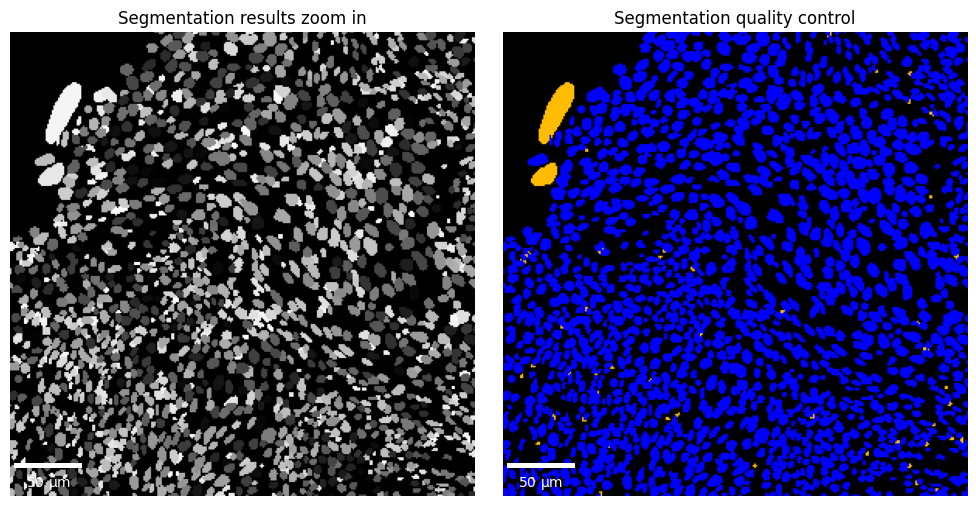

In [8]:
print("""The segmentation quality control image (left image) colored with blue and orange:

  Orange - indicates segmentation errors.
  Blue   - indicates correctly segmented regions.""")

plot_zoomed_comparison(segmentation_path, label_1='Segmentation results zoom in', img2=seg_image_colored_with_error_and_correct_region, label_2='Segmentation quality control',  figure_size=(10,5), center=(800,2300), cmap_color_1='gray')


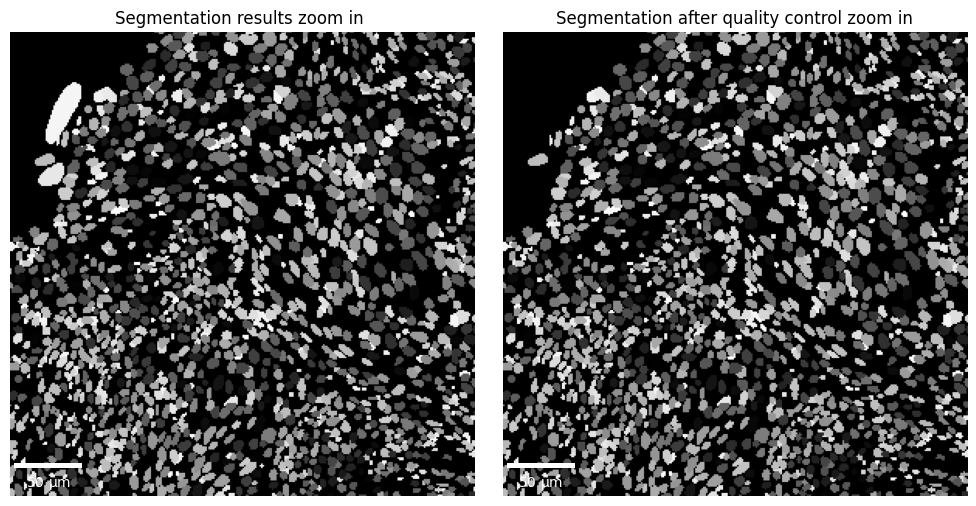

In [16]:
plot_zoomed_comparison(segmentation_path, segmentation_qc_path, 'Segmentation results zoom in ', 'Segmentation after quality control zoom in', figure_size=(10,5), center=(800,2300), cmap_color_1='gray', cmap_color_2='gray')
